In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from threading import Timer
from Quarto import *
from keras_sequential_ascii import sequential_model_to_ascii_printout

In [48]:
r = requests.get('http://srv.lucatoma.eu/valsdav/losses.txt')

In [2]:
with open("losses.txt") as file:
    text = file.read()

Epochs: 333900
Selected: 133900
1) Mean: 41.358956327
Std: 24.4285358603


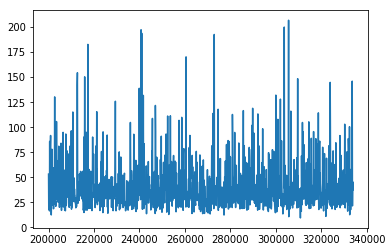

[  78.7274704    60.06675339   31.30816078   23.3854599   100.45481873
   12.48567963   57.85095978   13.96190166   33.03097534   17.50272369
   24.51582909   32.12030792   45.14815903   57.42005539   31.00050735
   94.95067596  145.9892273    21.3646698    45.4203949    37.32500458]


In [51]:
i = 200000
data = np.array([float(x) for x in text.split("\n")[50:]])  /32
print("Epochs: {}".format(len(data)*100))
print("Selected: {}".format((len(data)*100 - i)))
data1 = data[int(i*0.01)-1:]
index = list(range(i, (len(data)+1)*100,100))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))
plt.show()
print(data1[-20:])

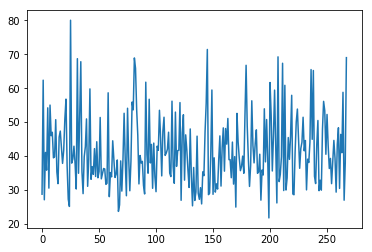

In [47]:
interval = 5
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

In [13]:
from keras import initializers
from keras.initializers import normal, identity
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD , Adam
LEARNING_RATE = 1e-4

def build_model():
    print("Now we build the model")
    model = Sequential()
    model.add(Conv2D(32, (2,3), strides=(1, 1), input_shape=(4,16,4), name="conv1"))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (2,3), strides=(1, 1), name="conv2"))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512, name="dense"))
    model.add(Activation('relu'))
    model.add(Dense(1, name="output"))
        
    adam = Adam(lr=LEARNING_RATE)
    model.compile(loss='mse',optimizer=adam)
    #plot_model(model,show_shapes=True, to_file='model.png')
    print("We finish building the model")
    return model



Using TensorFlow backend.


In [14]:
model = build_model()
model.load_weights("model.h5")
adam = Adam(lr=LEARNING_RATE)
model.compile(loss='mse',optimizer=adam)
print("Weights loaded!")

Now we build the model
We finish building the model
Weights loaded!


In [15]:
sequential_model_to_ascii_printout(model)
layers = model.layers

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      4   16    4
              Conv2D    \|/  -------------------       800     0.1%
                relu   #####      3   14   32
              Conv2D    \|/  -------------------     12352     1.5%
                relu   #####      2   12   64
             Flatten   ||||| -------------------         0     0.0%
                       #####        1536
               Dense   XXXXX -------------------    786944    98.3%
                relu   #####         512
               Dense   XXXXX -------------------       513     0.1%
                       #####           1


In [16]:
layers

Gameboard


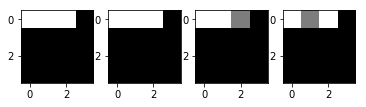

Spaces:  [(0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Item D, LeftItems: EFGHIJKLMNOP
Left items image


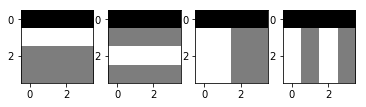

In [17]:
from Quarto import *
g = Gameboard()
g.apply_moves([((0,0),"A"), ((0,1),"B"),((0,2),"C")])
left = [l for l in"EFGHIJKLMNOP"]
s = Status(g, "D", left, left_items_image(left))
s.show()

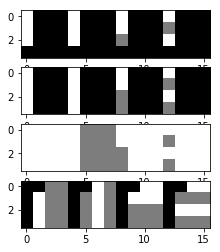

In [18]:
avs = s.get_available_actions()
actimg = s.get_action_image(avs[0])
show_action_image(actimg)

In [24]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations



img = visualize_activation(model,0 , filter_indices=1, seed_input=actimg,verbose=True, tv_weight=0 , lp_norm_weight=0)



Iteration: 1, named_losses: <zip object at 0x7fdca0346988>, overall loss: 17.057842254638672
Iteration: 2, named_losses: <zip object at 0x7fdca0330e88>, overall loss: 11.880400657653809
Iteration: 3, named_losses: <zip object at 0x7fdca0330c48>, overall loss: 8.172748565673828
Iteration: 4, named_losses: <zip object at 0x7fdca0330308>, overall loss: 5.107235908508301
Iteration: 5, named_losses: <zip object at 0x7fdca0330c08>, overall loss: 2.4191792011260986
Iteration: 6, named_losses: <zip object at 0x7fdca0330308>, overall loss: -0.014909562654793262
Iteration: 7, named_losses: <zip object at 0x7fdca0330448>, overall loss: -2.2642462253570557
Iteration: 8, named_losses: <zip object at 0x7fdca24cde88>, overall loss: -4.372108459472656
Iteration: 9, named_losses: <zip object at 0x7fdca24cd608>, overall loss: -6.367640018463135
Iteration: 10, named_losses: <zip object at 0x7fdca24cdec8>, overall loss: -8.271560668945312
Iteration: 11, named_losses: <zip object at 0x7fdca24cd408>, overal

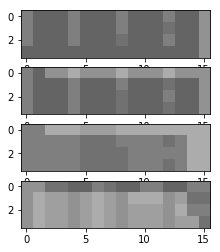

In [25]:
show_action_image(img)